In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 정규방정식을 통한 선형 회귀

선형회귀에서 찾아야 하는 파라미터 세트 = (theta0, theta1) = (절편, 기울기)

In [3]:
X = 2 + np.random.randn(100,1)
y = 4 + 3*X + np.random.rand(100,1)
X_for_LR = np.c_[np.ones((100,1)), X]

theta_best_with_normal_eq = np.linalg.inv(X_for_LR.T.dot(X_for_LR)).dot(X_for_LR.T).dot(y)
X_b = np.c_[np.ones((100,1)), X]

In [4]:
theta_best_with_normal_eq # original -> 4, 3이 나와야 하는데 데이터에 섞인 노이즈 때문에 약간 다름 (정규방정식이 제일 정확)

array([[4.52592876],
       [2.96723974]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best_with_normal_eq)

In [6]:
y_pred # x = 2일때 선형회귀의 예측값 

array([[ 4.52592876],
       [10.46040824]])

In [7]:
def LR_with_NE(input):
    x = np.array([[0], [input]])
    x_b = np.c_[np.ones((2,1)), x]
    pred = x_b.dot(theta_best_with_normal_eq)
    return pred[1][0]

In [8]:
LR_with_NE(2)

10.460408242596612

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
model.intercept_, model.coef_

(array([4.52592876]), array([[2.96723974]]))

In [11]:
# MSE
def MSE(x, y):
    return (np.sum((np.square(y-x)))) / len(x)

In [12]:
MSE(LR_with_NE(X), y)

0.07788927845679719

In [14]:
# RMSE
np.sqrt(MSE(LR_with_NE(X), y))

0.2790865071206367

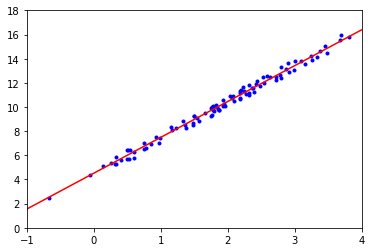

In [15]:
plt.plot(X, y, 'b.')
x = np.linspace(-3, 6, 100)
plt.plot(x, (x*model.coef_[0] + model.intercept_[0]), 'r-')
plt.xlim(-1, 4)
plt.ylim(0, 18)
plt.show()

# 경사 하강법을 통한 선형 회귀

In [30]:
# Batch gradient descent
eta = 0.1 # 학습률 -> 오차가 (실제값-예측값) 파라미터 공간에 얼마만큼의 영향력을 행사할지 정하는 hyperparameter
n_iteration = 1000
m = 100

theta0_trace_ = []
theta1_trace_ = []

theta_gd = np.random.randn(2,1)

for iteration in range(n_iteration):
    theta_gd = theta_gd - eta*(2/m*X_b.T.dot(X_b.dot(theta_gd)-y))
    theta0_trace_.append(theta_gd[0])
    theta1_trace_.append(theta_gd[1])

In [31]:
theta_gd

array([[4.52592876],
       [2.96723974]])

In [19]:
model.intercept_, model.coef_

(array([4.52592876]), array([[2.96723974]]))

In [21]:
MSE(LR_with_NE(X), y)

0.07788927845679719

In [32]:
# Stochastic gradient descent 전체 데이터에서 확률적으로 조금씩 뽑아서 

n_epochs = 50
t0 = 5
t1 = 50

theta0_trace = []
theta1_trace = []

def learning_schedule(t):
    return t0 / (t+t1)

theta_sgd = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd)-yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
        theta0_trace.append(theta_sgd[0])
        theta1_trace.append(theta_sgd[1])

In [33]:
theta_sgd

array([[4.52429862],
       [2.97223346]])

In [34]:
print('정규방정식에 의한 계수: ')
print('theta0: ', theta_best_with_normal_eq[0][0], ' theta1: ', theta_best_with_normal_eq[1][0])

print('\n경사하강법에 의한 계수: ')
print('theta0: ', theta_gd[0][0], ' theta1: ', theta_gd[1][0])

print('\n싸이킷런 제공 메서드에 의한 계수: ')
print('theta0: ', model.intercept_[0], ' theta1: ', model.coef_[0][0])

print('\n확률적 경사하강법에 의한 계수: ')
print('theta0: ', theta_sgd[0][0], ' theta1: ', theta_sgd[1][0])

print('\nMSE: ', MSE(LR_with_NE(X), y))

정규방정식에 의한 계수: 
theta0:  4.525928757955294  theta1:  2.9672397423206593

경사하강법에 의한 계수: 
theta0:  4.525928757955288  theta1:  2.967239742320661

싸이킷런 제공 메서드에 의한 계수: 
theta0:  4.525928757955297  theta1:  2.967239742320658

확률적 경사하강법에 의한 계수: 
theta0:  4.524298616972172  theta1:  2.9722334581623278

MSE:  0.07788927845679719


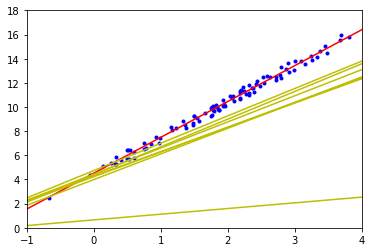

In [35]:
plt.plot(X, y, 'b.')
x = np.linspace(-3, 6, 100)
plt.plot(x, (x*model.coef_[0] + model.intercept_[0]), 'r-')
plt.xlim(-1, 4)
plt.ylim(0, 18)

for i in range(7):
    plt.plot(x, (x * theta0_trace[i] + theta1_trace[i]), 'y-')

plt.show()

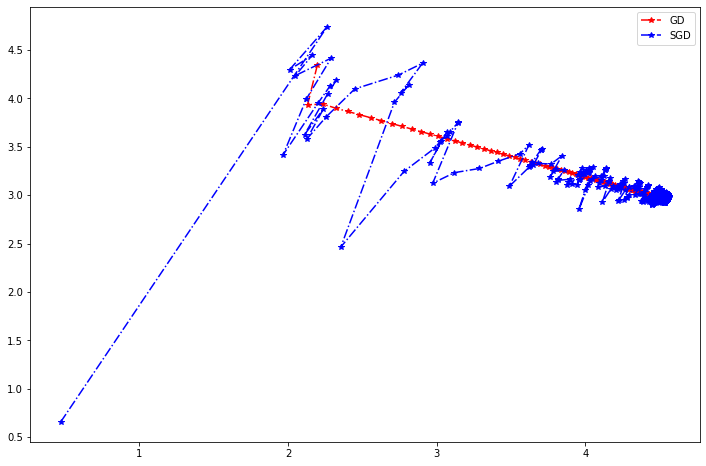

In [37]:
# 파라미터 공간에서의 theta 탐색 과정
plt.figure(figsize=(12,8))
plt.plot(theta0_trace_, theta1_trace_, 'r-.*',label='GD')
plt.plot(theta0_trace, theta1_trace, 'b-.*', label='SGD')
plt.legend()
plt.show()

# 왜 3차원 공간이 될지?
# 학습의 크기는 에러의 크기에 비례. 따라서 정답에 근접할수록 간격이 좁아짐

# 다항 회귀

In [38]:
m = 100
X = 6 * np.random.randn(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

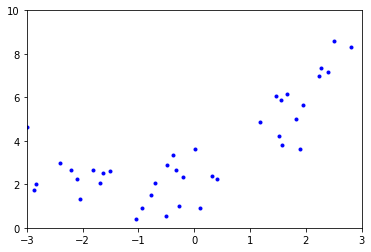

In [39]:
plt.plot(X, y, 'b.')
plt.xlim(-3,3)
plt.ylim(0,10)
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X) # 2차원 데이터에 x^2 특성을 추가하여 3차원 텐서데이터로 만든다

In [43]:
# 다중 선형회귀
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11536545]), array([[1.03752397, 0.50293336]]))

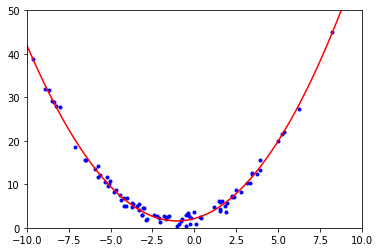

In [44]:
x = np.linspace(-10, 10, 100)
reg = lin_reg.intercept_[0] + lin_reg.coef_[0][0] * x + lin_reg.coef_[0][1] * x * x
plt.plot(X, y, 'b.')
plt.plot(x, reg, 'r-')
plt.xlim(-10,10)
plt.ylim(0,50)
plt.show()

# 학습 곡선 그리기

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

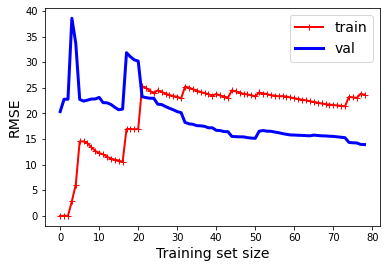

In [49]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

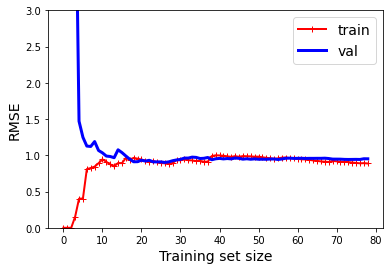

In [50]:
from sklearn.pipeline import Pipeline

poly_reg_2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(poly_reg_2, X, y)
plt.ylim(0,3)
plt.show()

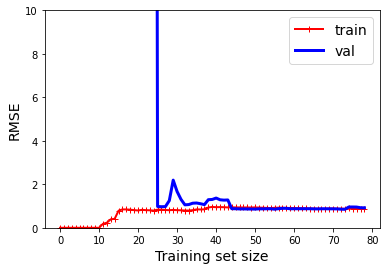

In [51]:
poly_reg_10 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(poly_reg_10, X, y)
plt.ylim(0,10)
plt.show()

# 규제 - 학습을 방해함으로써 과적합을 방지한다

책에서는 선형모델에 적용하는 예시를 보여주지만, 딥러닝 모델에서도 l1규제, l2규제는 그대로 쓴다

In [52]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# 릿지 규제 - l2 규제

In [53]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky') # 정규방정식을 통한 릿지 규제 (비추)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.7506673]])

In [54]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2') # 학습을 통한 릿지 규제 (추천)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.73093355])

# 라쏘 규제 - l1 규제

In [55]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.75357901])

In [56]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.73439542])

# 엘라스틱넷

In [59]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X, y)
elasticnet.predict([[1.5]])

array([1.75304348])

# 조기 종료 - Early Stopping and Callback

In [62]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# 훈련 데이터 생성
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 *  X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)), # 다항회귀로 바꿔준 후 
    ('std_scaler', StandardScaler()) # 정규화
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# 정규화 된 데이터로 SGD 학습, 규제는 없고, 학습률은 0.0005

sgd_red = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)


minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg) # 과적합 발생 전의 모델을 최고의 모델로 선정한다


# 로지스틱 회귀 - 이진 분류

Log loss 와 크로스 엔트로피

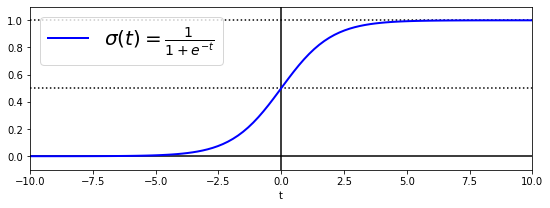

In [63]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))

plt.plot([-10,10], [0,0], 'k-')
plt.plot([-10,10], [0.5,0.5], 'k:')
plt.plot([-10,10], [1,1], 'k:')
plt.plot([0,0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left', fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [64]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [65]:
iris['data'].shape

(150, 4)

In [66]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

In [68]:
# 로지스틱 회귀: sigmoid 출력값을 확률밀도함수로 보아, 이 꽃이 Iris Virginica일 확률이 50%가 넘는지 안 넘는지 확인한다 (이진 분류)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

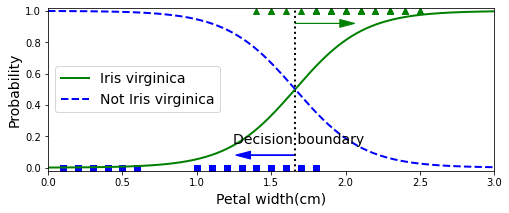

In [69]:
# 꽃잎의 크기에 따라 이 꽃이 Iris Virginica인 확률을 계산한 후, 이진분류를 하는 로지스틱 회귀 모델

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8,3))
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris virginica')
plt.text(decision_boundary+0.02, 0.15, 'Decision boundary', fontsize=14, color='k', ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel('Petal width(cm)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# 소프트맥스 회귀 - 다중 분류

#### 이진 분류 - 로지스틱 회귀 - 로그 로스
#### 다중 분류 - 소프트맥스 회귀 - 크로스 엔트로피
#### Classification 문제의 기본 중 기본

In [70]:
X = iris['data'][:, (2,3)] # 꽃잎의 너비와 길이 칼럼만 가져온다 
y = (iris['target']).astype(np.int) # 3가지 붓꽃을 분류하는 다중 분류 라벨을 생성한다
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [71]:
softmax_reg.predict([[5,2]])  # 주어진 데이터가 Iris verginica라고 예측해주는 것

array([2])

In [72]:
softmax_reg.predict_proba([[5,2]]) # 94.25%의 확률로 class2(Iris verginica) 이다.

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])